# Try to enable quantum snowflakes

### try normal way

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import Aer
from qiskit.utils import QuantumInstance

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator

## Classical snowflakes
- snowflakes are hexagons (angle of 60°)

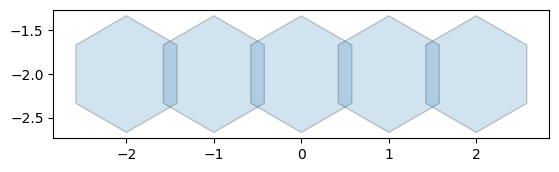

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np


offCoord = [[-2,-2],[-1,-2],[0,-2],[1,-2],[2,-2]]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for c in offCoord:
    hex = RegularPolygon((c[0], c[1]), numVertices=6, radius=2./3., alpha=0.2, edgecolor='k')
    ax.add_patch(hex)
plt.autoscale(enable = True)
plt.show()

4.9


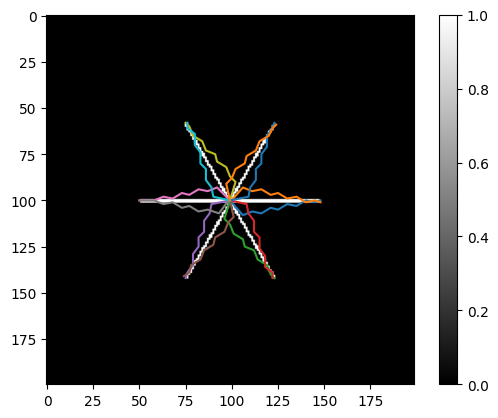

In [64]:
def angle_to_radians(alpha):
    return 2*np.pi*alpha/360

np.random.seed(42)

x_lim_low = -100
x_lim_high = 99

y_lim_low = 0
y_lim_high = 200

height = y_lim_high-y_lim_low
width = x_lim_high-x_lim_low

y_origin = height//2
x_origin = width//2

arr=np.zeros((height,width))

#only use 4 values
sf_widths = [0.9, 0.7, 0.8, 0.5, 0.6, 0.3, 0.4, 0.1, 0.2]
sf_distances = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

num_values = len(sf_widths)

#initialize first line(s)
for x in range(width//4):
    ## normal (angle = 0)
    arr[y_origin][x_origin+x]=1
    arr[y_origin+1][x_origin+x]=1
    # angle = 60
    arr[y_origin+int(x*np.sin(angle_to_radians(60)))][x_origin+int(x*np.cos(angle_to_radians(60)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(60)))+1][x_origin+int(x*np.cos(angle_to_radians(60)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(120)))][x_origin+int(x*np.cos(angle_to_radians(120)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(120)))+1][x_origin+int(x*np.cos(angle_to_radians(120)))]=1   
    arr[y_origin+int(x*np.sin(angle_to_radians(180)))][x_origin+int(x*np.cos(angle_to_radians(180)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(180)))+1][x_origin+int(x*np.cos(angle_to_radians(180)))]=1   
    arr[y_origin+int(x*np.sin(angle_to_radians(240)))][x_origin+int(x*np.cos(angle_to_radians(240)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(240)))+1][x_origin+int(x*np.cos(angle_to_radians(240)))]=1   
    arr[y_origin+int(x*np.sin(angle_to_radians(300)))][x_origin+int(x*np.cos(angle_to_radians(300)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(300)))+1][x_origin+int(x*np.cos(angle_to_radians(300)))]=1     
    
delta = (width//4)/(num_values+1)

#starting point is middle of snowflake
points_x_0 = [x_origin]
points_y_0 = [y_origin]

points_x = np.zeros((6,num_values+2))
points_y = np.zeros((6,num_values+2))

points_x_mir = np.zeros((6,num_values+2))
points_y_mir = np.zeros((6,num_values+2))

#starting point is middle of snowflake
points_x[0][0] = x_origin
points_y[0][0] = y_origin

#now calculate points
for vals in range(1, num_values+1):
    y = int(y_origin + sf_widths[vals-1]*2*delta)
    x = int(x_origin + vals*delta + sf_distances[vals-1]*delta)
    points_x[0][vals] = x
    points_y[0][vals] = y

#end point is on top   
points_x[0][num_values+1] = x_origin + width//4
points_y[0][num_values+1] = y_origin

print(delta)

#mirror y points on origin
for vals in range(0, num_values+2):
    points_y_mir[0][vals] = (2 * y_origin+1) - points_y[0][vals]
    points_x_mir[0][vals] = points_x[0][vals]

points_x_1 = []
points_y_1 = []
points_x_1_mir = []
points_y_1_mir = []

# now mirror points
for angle in range(1, 6):
    for idx in range(len(points_x[0])):
        # calculate distance from origin
        # rotate point
        # p'x = cos(theta) * (px-ox) - sin(theta) * (py-oy) + ox
        # p'y = sin(theta) * (px-ox) + cos(theta) * (py-oy) + oy
        points_x[angle][idx] = int((points_x[0][idx] - x_origin)*np.cos(angle_to_radians(60*angle)) - (points_y[0][idx] - y_origin)*np.sin(angle_to_radians(60*angle))) + x_origin
        points_y[angle][idx] = int((points_x[0][idx] - x_origin)*np.sin(angle_to_radians(60*angle)) + (points_y[0][idx] - y_origin)*np.cos(angle_to_radians(60*angle))) + y_origin
        points_x_mir[angle][idx] = int((points_x_mir[0][idx] - x_origin)*np.cos(angle_to_radians(60*angle)) - (points_y_mir[0][idx] - y_origin)*np.sin(angle_to_radians(60*angle))) + x_origin
        points_y_mir[angle][idx] = int((points_x_mir[0][idx] - x_origin)*np.sin(angle_to_radians(60*angle)) + (points_y_mir[0][idx] - y_origin)*np.cos(angle_to_radians(60*angle))) + y_origin

        
#print(points_x)
#print(points_y)
#now connect points
for idx in range(6):
    plt.plot(points_x[idx], points_y[idx])
    plt.plot(points_x_mir[idx], points_y_mir[idx])

plt.imshow(arr, cmap='gray',vmin=0, vmax=1)
plt.colorbar()
plt.show()

### now quantum approach
- take n qubits -> 2^n values of distributions and tweak them to be the branch widths
- take n qubits -> hadamard to determine the distances on the snowflake

In [65]:
#create circuits
num_qubits = 4

angles = np.linspace(0.5*np.pi, 1.5*np.pi, num_qubits)

values = [16,15/2,14,13/2,12,11/2,10,9/2,8,7/2,6,5/2,4,3/2,2,1]
sum = np.sum(values)
print(sum)

# a(0000), b(0000), a(0001)
init_values = np.sqrt(values/sum)

#proof
print(np.sum(init_values**2))

qc_widths = QuantumCircuit(num_qubits)
qc_widths.initialize(init_values, qc_widths.qubits)
qc_widths.measure_all()

#qc_widths = QuantumCircuit(num_qubits)
#qc_widths.h(0)
#for n in range(1, num_qubits):
#    qc_widths.ry(angles[n-num_qubits], n)
#qc_widths.cx(0,1)
#qc_widths.cx(0,2)
#qc_widths.cx(0,3)
#qc_widths.measure_all()

#make hadamard
qc_height = QuantumCircuit(num_qubits)
for n in range(num_qubits):
    qc_height.h(n)
qc_height.measure_all()

104.5
1.0


In [66]:
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

backend = Aer.get_backend('aer_simulator')

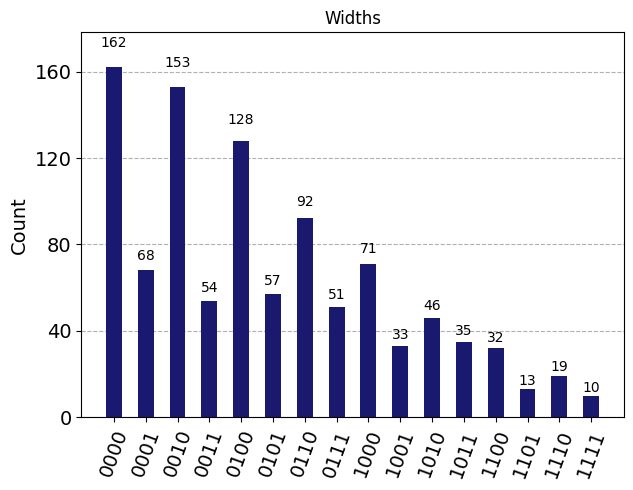

In [67]:
job_widths = execute(qc_widths, backend)
plot_histogram(job_widths.result().get_counts(), color='midnightblue', title="Widths")

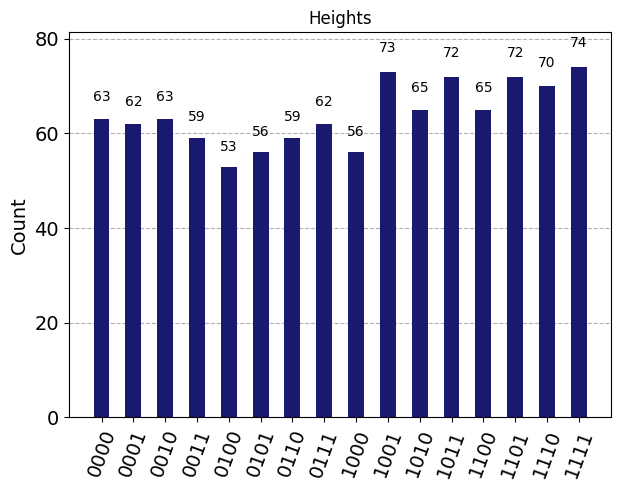

In [68]:
#run circuits and measure results
job_height = execute(qc_height, backend)
plot_histogram(job_height.result().get_counts(), color='midnightblue', title="Heights")

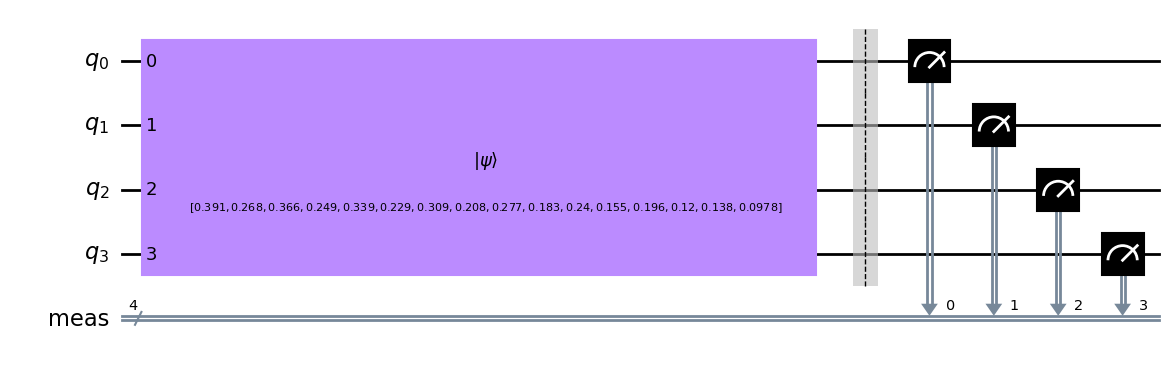

In [69]:
qc_widths.draw('mpl')

In [70]:
#extract points

num_values = 2**num_qubits

sf_widths = []
sf_distances = []

#only use num_values values
#print(job_height.result().get_counts())

shots_h = 0

# get number of shots
for number in job_height.result().get_counts().values():
      shots_h += number

print(shots_h)
        
for counts in range(num_values):
    bin_counts = f'{counts:04b}'
    #print(job_height.result().get_counts()[bin_counts])
    sf_distances.append(job_height.result().get_counts()[bin_counts]*num_values/shots_h/2)

print(sf_distances)
 
#only use num_values values
#print(job_widths.result().get_counts())

shots_w = 0

# get number of shots
for number in job_widths.result().get_counts().values():
      shots_w += number

print(shots_w)
        
for counts in range(num_values):
    bin_counts = f'{counts:04b}'
    #print(job_widths.result().get_counts()[bin_counts])
    sf_widths.append(job_widths.result().get_counts()[bin_counts]*num_values/shots_w/2)

print(sf_widths)    
    
#tree_widths = [0.9, 0.3, 0.8, 0.2, 0.7, 0.15, 0.6, 0.11, 0.5, 0.10, 0.4, 0.05, 0.2, 0.03, 0.1, 0.01]
#tree_distances = [0.5, 0.45, 0.55, 0.5, 0.47, 0.63, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

1024
[0.4921875, 0.484375, 0.4921875, 0.4609375, 0.4140625, 0.4375, 0.4609375, 0.484375, 0.4375, 0.5703125, 0.5078125, 0.5625, 0.5078125, 0.5625, 0.546875, 0.578125]
1024
[1.265625, 0.53125, 1.1953125, 0.421875, 1.0, 0.4453125, 0.71875, 0.3984375, 0.5546875, 0.2578125, 0.359375, 0.2734375, 0.25, 0.1015625, 0.1484375, 0.078125]


9.9


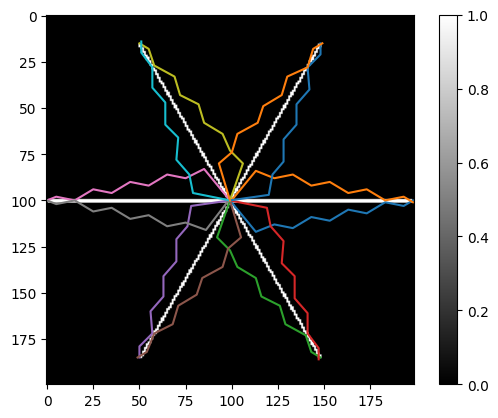

In [74]:
def angle_to_radians(alpha):
    return 2*np.pi*alpha/360

np.random.seed(42)

x_lim_low = -100
x_lim_high = 99

y_lim_low = 0
y_lim_high = 200

height = y_lim_high-y_lim_low
width = x_lim_high-x_lim_low

y_origin = height//2
x_origin = width//2

arr=np.zeros((height,width))

#only use 4 values
sf_widths = [0.9, 0.7, 0.8, 0.5, 0.6, 0.3, 0.4, 0.1, 0.2]
sf_distances = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

num_values = len(sf_widths)

#initialize first line(s)
for x in range(width//2):
    ## normal (angle = 0)
    arr[y_origin][x_origin+x]=1
    arr[y_origin+1][x_origin+x]=1
    # angle = 60
    arr[y_origin+int(x*np.sin(angle_to_radians(60)))][x_origin+int(x*np.cos(angle_to_radians(60)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(60)))+1][x_origin+int(x*np.cos(angle_to_radians(60)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(120)))][x_origin+int(x*np.cos(angle_to_radians(120)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(120)))+1][x_origin+int(x*np.cos(angle_to_radians(120)))]=1   
    arr[y_origin+int(x*np.sin(angle_to_radians(180)))][x_origin+int(x*np.cos(angle_to_radians(180)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(180)))+1][x_origin+int(x*np.cos(angle_to_radians(180)))]=1   
    arr[y_origin+int(x*np.sin(angle_to_radians(240)))][x_origin+int(x*np.cos(angle_to_radians(240)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(240)))+1][x_origin+int(x*np.cos(angle_to_radians(240)))]=1   
    arr[y_origin+int(x*np.sin(angle_to_radians(300)))][x_origin+int(x*np.cos(angle_to_radians(300)))]=1
    arr[y_origin+int(x*np.sin(angle_to_radians(300)))+1][x_origin+int(x*np.cos(angle_to_radians(300)))]=1     
    
delta = (width//2)/(num_values+1)

#starting point is middle of snowflake
points_x_0 = [x_origin]
points_y_0 = [y_origin]

points_x = np.zeros((6,num_values+2))
points_y = np.zeros((6,num_values+2))

points_x_mir = np.zeros((6,num_values+2))
points_y_mir = np.zeros((6,num_values+2))

#starting point is middle of snowflake
points_x[0][0] = x_origin
points_y[0][0] = y_origin

#now calculate points
for vals in range(1, num_values+1):
    y = int(y_origin + sf_widths[vals-1]*2*delta)
    x = int(x_origin + vals*delta + sf_distances[vals-1]*delta)
    points_x[0][vals] = x
    points_y[0][vals] = y

#end point is on top   
points_x[0][num_values+1] = x_origin + width//2
points_y[0][num_values+1] = y_origin

print(delta)

#mirror y points on origin
for vals in range(0, num_values+2):
    points_y_mir[0][vals] = (2 * y_origin+1) - points_y[0][vals]
    points_x_mir[0][vals] = points_x[0][vals]

points_x_1 = []
points_y_1 = []
points_x_1_mir = []
points_y_1_mir = []

# now mirror points
for angle in range(1, 6):
    for idx in range(len(points_x[0])):
        # calculate distance from origin
        # rotate point
        # p'x = cos(theta) * (px-ox) - sin(theta) * (py-oy) + ox
        # p'y = sin(theta) * (px-ox) + cos(theta) * (py-oy) + oy
        points_x[angle][idx] = int((points_x[0][idx] - x_origin)*np.cos(angle_to_radians(60*angle)) - (points_y[0][idx] - y_origin)*np.sin(angle_to_radians(60*angle))) + x_origin
        points_y[angle][idx] = int((points_x[0][idx] - x_origin)*np.sin(angle_to_radians(60*angle)) + (points_y[0][idx] - y_origin)*np.cos(angle_to_radians(60*angle))) + y_origin
        points_x_mir[angle][idx] = int((points_x_mir[0][idx] - x_origin)*np.cos(angle_to_radians(60*angle)) - (points_y_mir[0][idx] - y_origin)*np.sin(angle_to_radians(60*angle))) + x_origin
        points_y_mir[angle][idx] = int((points_x_mir[0][idx] - x_origin)*np.sin(angle_to_radians(60*angle)) + (points_y_mir[0][idx] - y_origin)*np.cos(angle_to_radians(60*angle))) + y_origin

        
#print(points_x)
#print(points_y)
#now connect points
for idx in range(6):
    plt.plot(points_x[idx], points_y[idx])
    plt.plot(points_x_mir[idx], points_y_mir[idx])

plt.imshow(arr, cmap='gray',vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright